# Day 2

## Utilities
At least Python 3.7 for precise timing function!

In [1]:
!wget https://raw.githubusercontent.com/solalatus/FS_algorithms_and_software_concepts_helper_functions/main/Lab-Day-2/benchmark.py
!wget https://raw.githubusercontent.com/solalatus/FS_algorithms_and_software_concepts_helper_functions/main/Lab-Day-2/data_generator.py

--2021-04-03 21:45:16--  https://raw.githubusercontent.com/solalatus/FS_algorithms_and_software_concepts_helper_functions/main/Lab-Day-2/benchmark.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2631 (2.6K) [text/plain]
Saving to: ‘benchmark.py’

benchmark.py        100%[===================>]   2.57K  --.-KB/s    in 0.001s  

2021-04-03 21:45:16 (4.26 MB/s) - ‘benchmark.py’ saved [2631/2631]

--2021-04-03 21:45:16--  https://raw.githubusercontent.com/solalatus/FS_algorithms_and_software_concepts_helper_functions/main/Lab-Day-2/data_generator.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... 

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import *
from benchmark import *

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Generate random data for speed tests
For sample distribution will be used for sorting performance tests


Classical sorting algorithm testing distributions:
- A: Uniform distribution
- A2: Sorted "distribution"
- A3: Sorted reversed "distribution"
- A4: Sorted few unique "distribution"

A few real life distributions:
- B: Standard normal distribution
- C: Binomial distribution
- D: Step and noise "distribution"

In [3]:
# Generated data samples
data = {}

# Plot settings
sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("whitegrid")

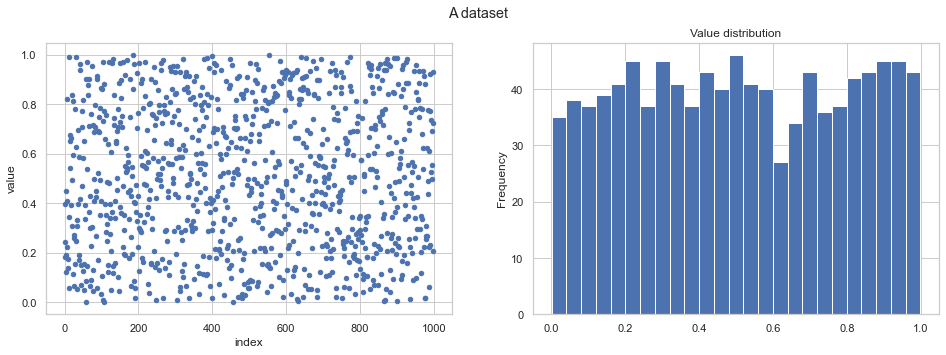

In [4]:
data = uniform(data, sample_nbr=1000, plot=True)

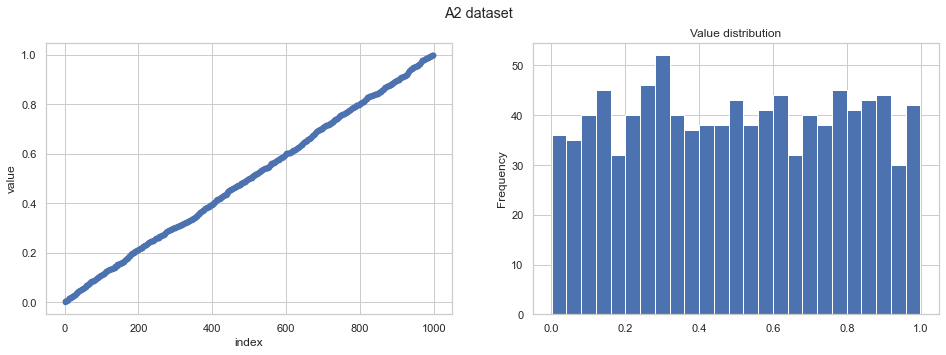

In [5]:
data = sorted_data(data, sample_nbr=1000, plot=True)

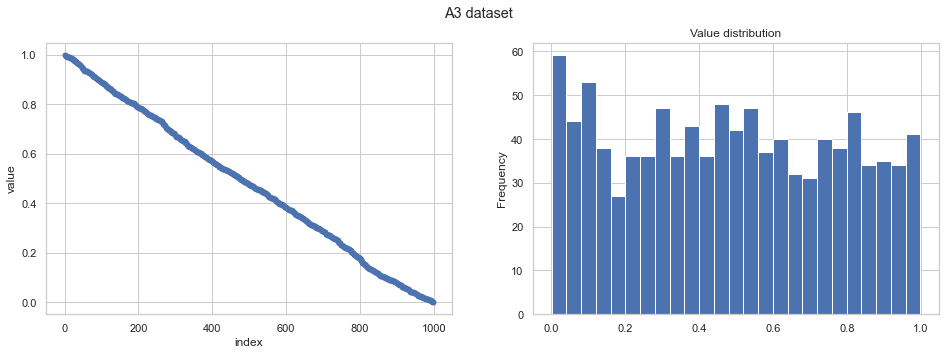

In [6]:
data = sorted_reversed_data(data, sample_nbr=1000, plot=True)

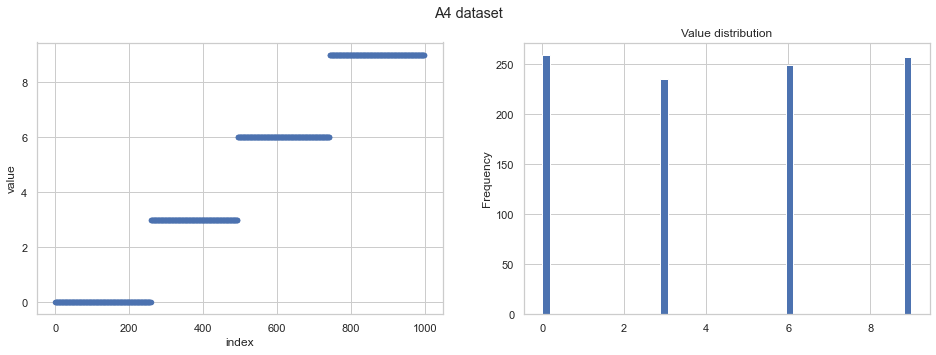

In [7]:
data = sorted_few_unique(data, sample_nbr=1000, plot=True)

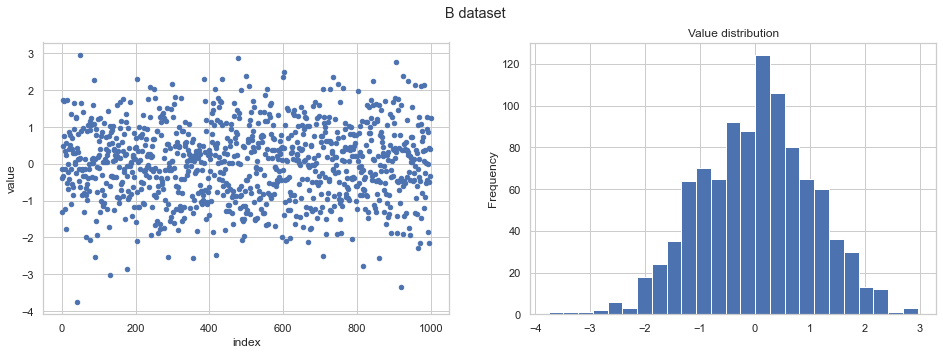

In [8]:
data = standard_normal(data, sample_nbr=1000, plot=True)

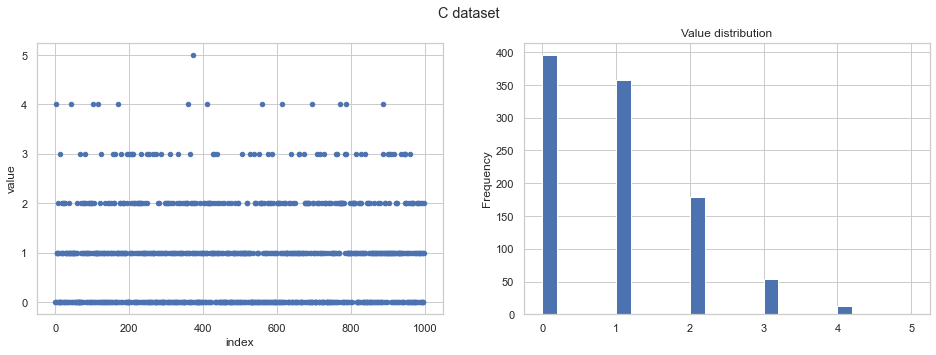

In [9]:
data = binomial(data, sample_nbr=1000, plot=True)

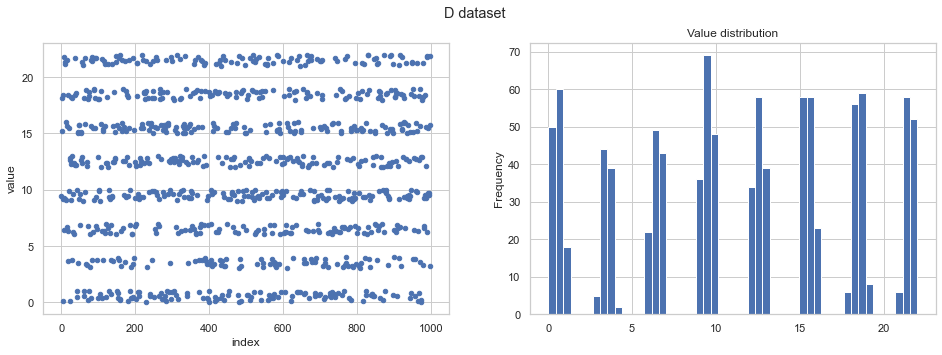

In [10]:
data = step_and_noise(data, sample_nbr=1000, plot=True)

In [11]:
# Plot settings
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

## Bubble sort

In [12]:
def bubble_sort(data): 
    """ Very basic implementation of Bubble sort """

     # Make sure you don't mess up the input
    input_list = data.copy()
    
    # Number of data points
    num_of_items = len(input_list) 
  
    # Main cycle throught all the elements
    # To avoid doing the last element twice, we do -1, just to save some cost.
    for i in range(num_of_items-1): 
  
        # We are assuming, that the last i elements at the end are already ordered 
        for j in range(0, num_of_items-i-1): 

            # While traversing the array from 0 to num_of_items-i-1 
            # Swap if the element and it's next neighbor are not in order  
            
            if input_list[j] > input_list[j+1] : 
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j]
    return input_list

## Selection sort

In [13]:
def selection_sort(data):
    """ Basic implementation of selection sort """
    
    # Make sure you don't mess up the input
    input_list = data.copy()
    
    # We iterate through the input 
    for i in range(len(input_list)): 

        # We llok for the smallest element in the remaining,
        # unordered section of the input
        
        #Let'S start with the current element as minimum
        min_position = i
        # we traverse the "remaining" part of the input
        for j in range(i+1, len(input_list)): 
            #If some element in the remaining part is smaller
            if input_list[min_position] > input_list[j]: 
                #we memorize it'S position
                min_position = j

        # And after the minimum search, 
        # we do a swap for the newly found minimum element 
        # with the item we started our current search with         
        input_list[i], input_list[min_position] = input_list[min_position], input_list[i] #Nice, "in-place" swapping     

    return input_list

## Insertion sort

In [14]:
def insertion_sort(data):
    """ Basic implementation of insertion sort """
    
    # Make sure you don't mess up the input
    input_list = data.copy()
    
    #We do a traversal starting from 1, the second element
    for i in range(1, len(input_list)): 

        #we take the current element
        current_value = input_list[i]
        
        #For all the elements up till the current key
        #shift them by one position, if they are greater than the current element
        j = i-1
        while j >=0 and current_value < input_list[j]: 
                #do the shift
                input_list[j+1] = input_list[j] 
                #previous position
                j -= 1

        #Finally, place the current_value to the beginning of the part we are operating on
        input_list[j+1] = current_value 

    return input_list

## Performance bechmarking

### Let's play with the already implemented sorting algorithms
Use a small dataset size because these are sort types doesn't scale well the number of samples.

Testing function:  bubble_sort
Data type:  A_500
Data type:  A2_500
Data type:  A3_500
Data type:  A4_500
Testing function:  selection_sort
Data type:  A_500
Data type:  A2_500
Data type:  A3_500
Data type:  A4_500
Testing function:  insertion_sort
Data type:  A_500
Data type:  A2_500
Data type:  A3_500
Data type:  A4_500


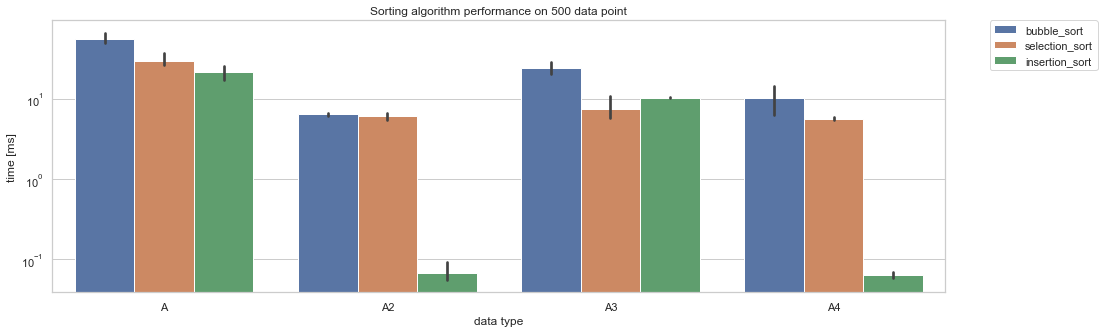

In [15]:
data_dist = ['uniform', 'sorted_data', 'sorted_reversed_data', 'sorted_few_unique'] # A / A2 / A3 / A4
sample_nbr = 500
sort_functions = [bubble_sort, selection_sort, insertion_sort]
runs=3

benchmark(data_dist=data_dist,
          sample_nbr=sample_nbr, 
          sort_functions=sort_functions,
          runs=runs)

### Implement a sorting algorithm which is faster for a mid sized dataset

__Your task:__ is to find and implement sortinga algorithms or their combinations in Python, which perform the best on all the datasets above. You are allowed to use different algorithms for different datasets. 

Please be sure to manifest your Python based implementation below, so no calling to external resources or to default sort.

In [16]:
# TODO: implement a faster sort

def my_wonderful_sort(data):
    """ Some sort of sort """
    
    # Make sure you don't mess up the input

    
    # ...your lovely and complex code here...
    
    return #whatever has to be returned

You can - and should - use the benchmarking function to show your results.

__Second task:__

Please also write some thoughts and comments on why you choose the algo(s) you choose, and reason about them! 

In [ ]:
data_dist = ['uniform', 'sorted_data', 'sorted_reversed_data', 'sorted_few_unique', # A / A2 / A3 / A4
             'standard_normal', 'binomial', 'step_and_noise'] # B / C / D
sample_nbr = 5000
sort_functions = [...my_wonderful_sort...] #or whatever you choose to name it...
runs=3

benchmark(data_dist=data_dist,
          sample_nbr=sample_nbr, 
          sort_functions=sort_functions,
          runs=runs)

### Let's try python's default sorting algorithm

As a hard to beat ideal benchmark:

The default sort in Python is a super smart algorithm which performs well on most real life data. (Also written in C for extra speed, so don't despair if you can't get as close as you would like to...)

In [18]:
def default_sort(data):
    """ Wrapper for python default sort """
    
    # Make sure you don't mess up the input
    input_list = data.copy()
    
    return sorted(input_list)

Testing function:  default_sort
Data type:  A_50000
Data type:  A2_50000
Data type:  A3_50000
Data type:  A4_50000
Data type:  B_50000
Data type:  C_50000
Data type:  D_50000


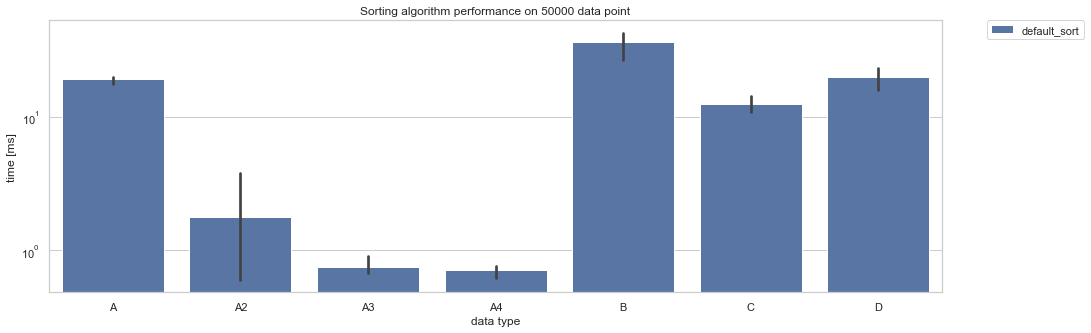

In [19]:
data_dist = ['uniform', 'sorted_data', 'sorted_reversed_data', 'sorted_few_unique', # A / A2 / A3 / A4
             'standard_normal', 'binomial', 'step_and_noise'] # B / C / D
sample_nbr = 50000
sort_functions = [default_sort]
runs=3

benchmark(data_dist=data_dist,
          sample_nbr=sample_nbr, 
          sort_functions=sort_functions,
          runs=runs)